### Importing modules

In [1]:
import pandas as pd
import numpy as np

from skimage import io
from skimage.transform import rescale, resize
from skimage.color import rgb2gray

from sklearn.preprocessing import normalize

import tensorflow as tf
from tensorflow import keras

C:\Users\Chris\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [23]:
path = './train/NORMAL/IM-0115-0001.jpeg'
image1 = io.imread(path)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


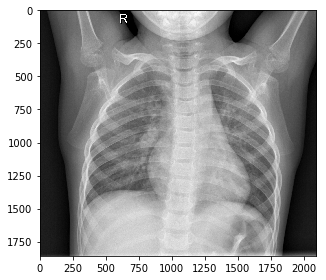

In [24]:
#Base image
io.imshow(image1)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


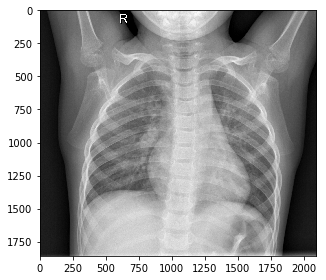

In [26]:
gray = rgb2gray(image1)
io.imshow(gray)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Chris\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


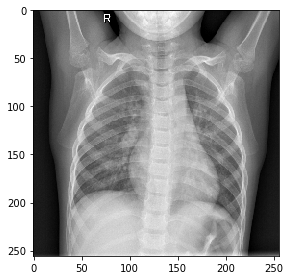

In [33]:
resized = resize(gray, (256,256))
io.imshow(resized)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


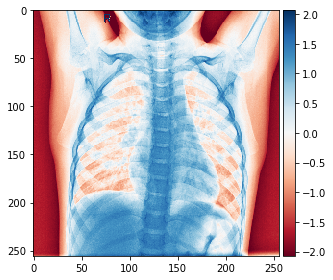

In [40]:
mean_sub = (resized - np.mean(resized)) / np.std(resized)
io.imshow(mean_sub)

### Defined functions

In [38]:
#Define a function to grayscale, resize and normalize all images from a folder

def img_process(folder, size):
    """Accepts an folder path as input and returns a list of all images in that folder 
    in grayscale, resized to square x by x dimensions with normalized pixel values"""
    imageset = io.imread_collection(folder)
    normed_images = []
    for i in range(0,len(imageset)):
        try:
            gray = rgb2gray(imageset[i])
        except:
            gray = imageset[i]
        resized = resize(gray, (size,size))
        normed = normalize(resized) #NOTE: I will need to edit this so the images are normalized AFTER this function, so I can use the mean/std from the training set on the others.
        normed_images.append(normed)
    return normed_images

In [3]:
#Function to generate category labels for each image set

def generate_labels(set1, set2):
    """Takes image sets in different categories and returns a list of binary labels"""
    labels = []
    for i in range(len(set1)):
        labels.append(0)
    for j in range(len(set2)):
        labels.append(1)
    return labels

In [4]:
#Function to convert a list of values to a tensorflow dataset

def generate_tf_data(data):
    """Accepts a list or array of data and converts it to a TensorFlow dataset object"""
    tensors = [tf.convert_to_tensor(x) for x in data]
    dataset = tf.data.Dataset.from_tensors(tensors)
    return dataset

### Cleaning and processing image sets

In [5]:
#Process the normal training set
folder = './train/NORMAL/*.jpeg'
training_n = img_process(folder, 256)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [6]:
#Process the pneumonia training set
folder = './train/PNEUMONIA/*.jpeg'
training_p = img_process(folder, 256)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [7]:
#Concatenate the images into one set, confirm size of subsets and calculate baseline accuracy for this set
train_images = training_n + training_p
train_labels = generate_labels(training_n, training_p)
print(len(training_n))
print(len(training_p))
print(len(train_images))
baseline_train = (len(training_p)/len(train_images))
print('training baseline: ' + str(baseline_train))

1341
3875
5216
training baseline: 0.7429064417177914


In [8]:
#Repeat the process for the test images
folder = './test/NORMAL/*.jpeg'
test_n = img_process(folder, 256)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [9]:
folder = './test/PNEUMONIA/*.jpeg'
test_p = img_process(folder, 256)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [10]:
test_images = test_n + test_p
test_labels = generate_labels(test_n, test_p)
print(len(test_n))
print(len(test_p))
print(len(test_images))
baseline_test = (len(test_p)/len(test_images))
print('test baseline: ' + str(baseline_test))

234
390
624
test baseline: 0.625


In [11]:
#And finally the validation set
folder = './val/NORMAL/*.jpeg'
val_n = img_process(folder, 256)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [12]:
folder = './val/PNEUMONIA/*.jpeg'
val_p = img_process(folder, 256)

C:\Users\Chris\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [13]:
val_images = val_n + val_p
val_labels = generate_labels(val_n, val_p)
print(len(val_n))
print(len(val_p))
print(len(val_images))
baseline_val = (len(val_p)/len(val_images))
print('validation baseline: ' + str(baseline_val))

8
8
16
validation baseline: 0.5


### Generating data input for TensorFlow

In [31]:
#Generate training datasets
X_train = generate_tf_data(train_images)
y_train = generate_tf_data(train_labels)

In [32]:
#Test datasets
X_test = generate_tf_data(test_images)
y_test = generate_tf_data(test_labels)

In [33]:
#Validation datasets
X_val = generate_tf_data(val_images)
y_val = generate_tf_data(val_labels)

### Test a simple CNN using Keras

In [50]:
input_shape = (256, 256, 1)
num_classes = 2
batch_size = 64
epochs = 5

In [41]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

In [43]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [44]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

In [ ]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history])